In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('churn-data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df = df.drop(columns=['customerID'])
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['TotalCharges']

/var/folders/sq/wr5p4qg568130981k8yms_hh0000gn/T/ipykernel_42101/1070470423.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [39]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                  'PaperlessBilling', 'Churn']
binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
for column in binary_columns:
    df[column] = df[column].map(binary_mapping)


In [40]:
df['OnlineSecurity'] = (df['OnlineSecurity'] == 'Yes').astype("int")
df['OnlineBackup'] = (df['OnlineBackup'] == 'Yes').astype("int")
df['DeviceProtection'] = (df['DeviceProtection'] == 'Yes').astype("int")
df['TechSupport'] = (df['TechSupport'] == 'Yes').astype("int")
df['StreamingTV'] = (df['StreamingTV'] == 'Yes').astype("int")
df['StreamingMovies'] = (df['StreamingMovies'] == 'Yes').astype("int")
df['MultipleLines'] = (df['MultipleLines'] == 'Yes').astype("int")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [41]:

scaler = MinMaxScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,0.558706,0.033210,1


In [42]:
df = pd.get_dummies(df, drop_first=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,...,0.115423,0.001275,0,False,False,False,False,False,True,False
1,1,0,0,0,0.472222,1,0,1,0,1,...,0.385075,0.215867,0,False,False,True,False,False,False,True
2,1,0,0,0,0.027778,1,0,1,1,0,...,0.354229,0.010310,1,False,False,False,False,False,False,True
3,1,0,0,0,0.625000,0,0,1,0,1,...,0.239303,0.210241,0,False,False,True,False,False,False,False
4,0,0,0,0,0.027778,1,0,0,0,0,...,0.521891,0.015330,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,0,1,...,0.662189,0.227521,0,False,False,True,False,False,False,True
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0.845274,0.847461,0,True,False,True,False,True,False,False
7040,0,0,1,1,0.152778,0,0,1,0,0,...,0.112935,0.037809,0,False,False,False,False,False,True,False
7041,1,1,1,0,0.055556,1,1,0,0,0,...,0.558706,0.033210,1,True,False,False,False,False,False,True


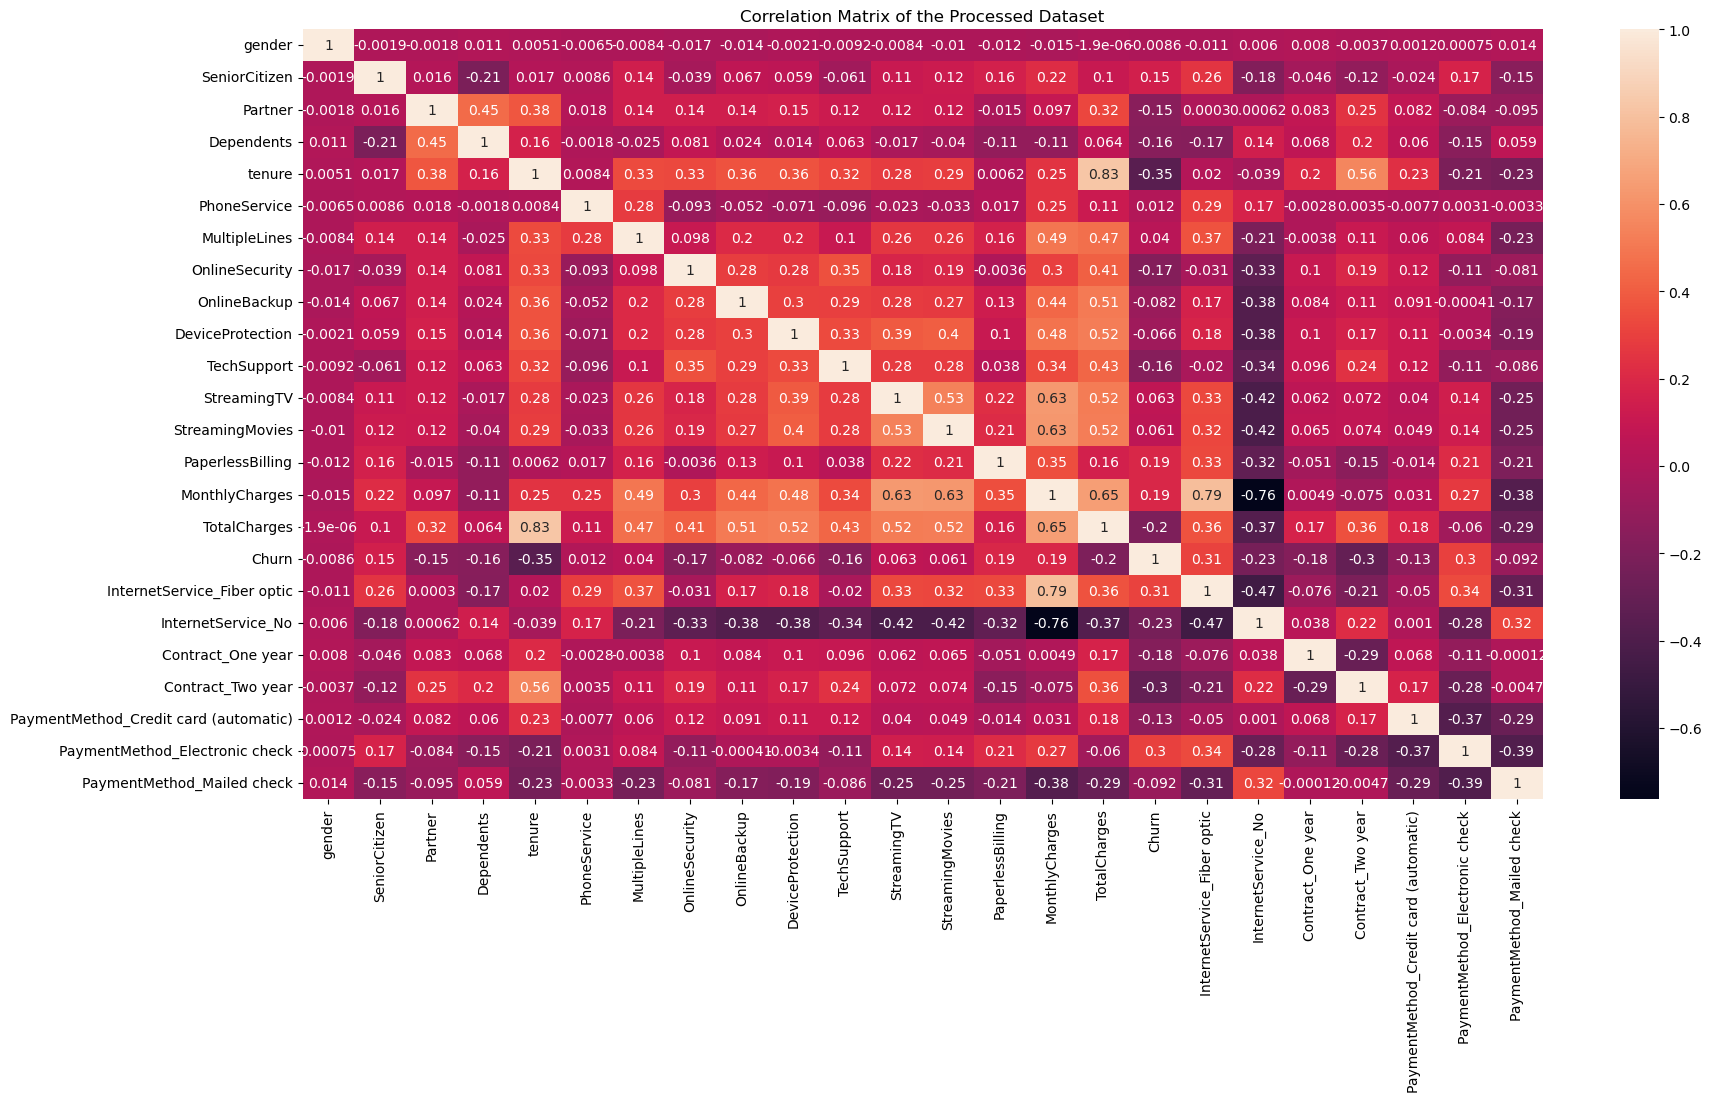

In [43]:
corr = df.corr()
corr

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix of the Processed Dataset")
plt.show()

In [44]:
classes = df['Churn'].unique()
print(classes)
dep_var = df['Churn']
indp_var = df.drop(columns=['Churn'])
print(indp_var)

[0 1]
      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          0              0        1           0  0.013889             0   
1          1              0        0           0  0.472222             1   
2          1              0        0           0  0.027778             1   
3          1              0        0           0  0.625000             0   
4          0              0        0           0  0.027778             1   
...      ...            ...      ...         ...       ...           ...   
7038       1              0        1           1  0.333333             1   
7039       0              0        1           1  1.000000             1   
7040       0              0        1           1  0.152778             0   
7041       1              1        1           0  0.055556             1   
7042       1              0        0           0  0.916667             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0    

In [45]:
# Split data 70%-20% into training set and test set
x_train, x_test, y_train_a, y_test_a = train_test_split(indp_var,dep_var,test_size=0.2,random_state=42)

In [46]:

# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train_a)
y_test = utils.to_categorical(y_test_a)
print('Ready...')

Ready...


In [47]:
hl = 128
model = Sequential()
model.add(Dense(hl, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(classes), input_dim=hl, activation='softmax'))
 
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
 

 

Epoch 1/20


/opt/anaconda3/envs/py-torch-tf-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.7420 - loss: 0.5168 - val_accuracy: 0.8057 - val_loss: 0.4266
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.7944 - loss: 0.4266 - val_accuracy: 0.7835 - val_loss: 0.4235
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.7907 - loss: 0.4248 - val_accuracy: 0.8083 - val_loss: 0.4126
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7968 - loss: 0.4233 - val_accuracy: 0.8057 - val_loss: 0.4117
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8049 - loss: 0.3944 - val_accuracy: 0.8030 - val_loss: 0.4112
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8000 - loss: 0.4284 - val_accuracy: 0.8066 - val_loss: 0.4081
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.8150 - loss: 0.4001 - val_accuracy: 0.8101 - val_loss: 0.4079
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8066 - loss: 0.4062 - val_accurac

In [48]:
# Evaluate on test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)  
y_test_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes, y_pred))
f1 = f1_score(y_test_classes, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")
accuracy = accuracy_score(y_test_classes, y_pred)
print(f"accuracy: {accuracy:.2f}")
print(confusion_matrix(y_test_classes, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.59      0.60       373

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

F1 Score: 0.79
accuracy: 0.79
[[901 135]
 [154 219]]


In [49]:
correct_count = 0
wrong_count = 0
 
for i in range(len(x_test)):
    test_data_input = x_test.iloc[i:i+1]  # Select one test sample
    test_data_output = y_test_a.iloc[i]    # Corresponding actual value
    predicted_output = (model.predict(test_data_input) > 0.5).astype("int32")[0][1]  # Predicted value
     # Check if the prediction is correct
    if predicted_output == test_data_output:
        correct_count += 1
    else:
        wrong_count += 1
    
# Print the results
print(f"Correct Predictions: {correct_count}")
print(f"Wrong Predictions: {wrong_count}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/st